In [1]:
# Nick Elias

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   VersionAll prereqs installed.

------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
executing         

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Nick Elias

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1:

In [4]:
# URL of the archived page
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the content of the URL
response = requests.get(url)
response.raise_for_status()  # Check for any errors in the request

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the main article content (usually inside <article> tag, but might vary)
article = soup.find('article')

# If the article isn't found, you may need to adjust the extraction logic.
if article:
    article_html = str(article)  # Convert the article element back to a string
else:
    raise ValueError("Article not found")

# Save the article HTML to a .pkl file
with open("article_content.pkl", "wb") as file:
    pickle.dump(article_html, file)

print("Article HTML saved to article_content.pkl")

Article HTML saved to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2:

In [5]:
# Load the article HTML from the .pkl file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Convert the HTML string into a BeautifulSoup object
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print the text content from the article
article_text = soup.get_text()

print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3:

In [7]:
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Filter out stopwords, punctuation, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each token
token_freq = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print the most common tokens with their frequencies
print("Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

# Print all token frequencies (for reference)
print("\nAll Token Frequencies:")
for token, freq in token_freq.items():
    print(f"Token: {token}, Frequency: {freq}")


Most Common Tokens:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10

All Token Frequencies:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: work, Frequency: 2
Token: 130, Frequency: 1
Token: comments, Frequency: 1
Token: lewin, Frequency: 1
Token: day, Frequency: 3
Token: march, Frequency: 2
Token: 22, Frequency: 1
Token: 2021, Frequency: 1
Token: think, Frequency: 1
Token: onward, Frequency: 1
Token: automotive, Frequency: 6
Token: technology, Frequency: 10
Token: usually, Frequency: 1
Token: thing, Frequency: 2
Token: come, Frequency: 5
Token: mind, Frequency: 3
Token: engines, Frequency: 1
Token: fuel, Frequency: 1
Token: efficiency, Frequency: 3
Token: switch, Frequency: 2
Token: electric, Frequency: 1
Token: power, Frequency: 3
Token: mean, Frequency: 1
Token: thousands, Frequency: 1
Token: engineers, Frequency: 2
Token: world, Frequency: 2
Token: working, Fr

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4:

In [12]:
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML content to extract text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Filter out stopwords, punctuation, and whitespace, and get the lemmatized text
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the most common lemmas with their frequencies
print("Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

# Print all lemma frequencies (for reference)
print("\nAll Lemma Frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most Common Lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10

All Lemma Frequencies:
Lemma: laser, Frequency: 40
Lemma: headlights, Frequency: 2
Lemma: work, Frequency: 3
Lemma: 130, Frequency: 1
Lemma: comment, Frequency: 1
Lemma: lewin, Frequency: 1
Lemma: day, Frequency: 4
Lemma: march, Frequency: 2
Lemma: 22, Frequency: 1
Lemma: 2021, Frequency: 1
Lemma: think, Frequency: 1
Lemma: onward, Frequency: 1
Lemma: automotive, Frequency: 6
Lemma: technology, Frequency: 10
Lemma: headlight, Frequency: 28
Lemma: usually, Frequency: 1
Lemma: thing, Frequency: 3
Lemma: come, Frequency: 7
Lemma: mind, Frequency: 3
Lemma: engine, Frequency: 1
Lemma: fuel, Frequency: 1
Lemma: efficiency, Frequency: 3
Lemma: switch, Frequency: 2
Lemma: electric, Frequency: 1
Lemma: power, Frequency: 3
Lemma: mean, Frequency: 2
Lemma: thousand, Frequency: 1
Lemma: engineer, Frequency: 2
Lemma: world, Frequency:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5:

In [9]:
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the occurrence of any of the interesting tokens.
    
    Args:
    - sentence (str): The sentence to analyze.
    - interesting_tokens (list): A list of interesting tokens (in lowercase).
    
    Returns:
    - float: The score (fraction of interesting tokens in the sentence).
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Filter out punctuation, stopwords, and spaces
    words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many interesting tokens are in the sentence
    interesting_count = sum(1 for word in words if word in interesting_tokens)
    
    # Return the score (interesting_count / total number of words)
    return interesting_count / len(words) if len(words) > 0 else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the occurrence of any of the interesting lemmas.
    
    Args:
    - sentence (str): The sentence to analyze.
    - interesting_lemmas (list): A list of interesting lemmas (in lowercase).
    
    Returns:
    - float: The score (fraction of interesting lemmas in the sentence).
    """
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Filter out punctuation, stopwords, and spaces
    words = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many interesting lemmas are in the sentence
    interesting_count = sum(1 for lemma in words if lemma in interesting_lemmas)
    
    # Return the score (interesting_count / total number of words)
    return interesting_count / len(words) if len(words) > 0 else 0


In [ ]:
# Testing the methods

# Get the first sentence from the article
sentences = article_text.split('.')
first_sentence = sentences[0]  # First sentence

# Example: list of frequent tokens and lemmas from previous steps
frequent_tokens = ['laser', 'work', 'headlight', 'car', 'technology']  # Replace with actual tokens
frequent_lemmas = ['laser', 'work', 'headlight', 'car', 'technology']  # Replace with actual lemmas

# Score the first sentence using both methods
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

# Print the results
print(f"Score by Token: {token_score}")
print(f"Score by Lemma: {lemma_score}")

Score by Token: 0.15
Score by Lemma: 0.2


'\n\nHow Laser Headlights Work\n\n\n                130 Comments            \n\nby:\nLewin Day\n\n\n\nMarch 22, 2021\n\n\n\n\n\n\n\n\nWhen we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind'

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6:

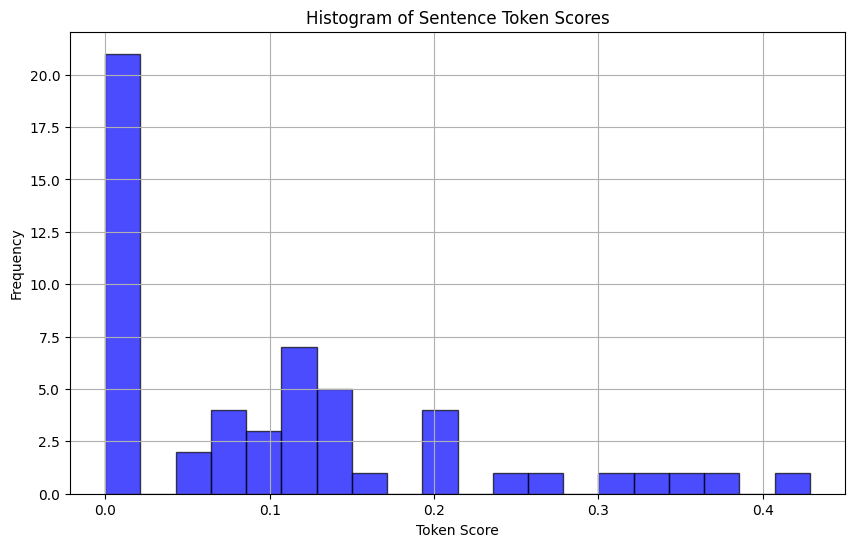

In [16]:
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Assuming you've already loaded the article text and defined interesting tokens
# Example: list of frequent tokens from previous steps
frequent_tokens = ['laser', 'work', 'headlight', 'car', 'technology']
article_text = soup.get_text()

# Split the article into sentences
sentences = article_text.split('.')

# Define a function to score each sentence using tokens
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    interesting_count = sum(1 for word in words if word in interesting_tokens)
    return interesting_count / len(words) if len(words) > 0 else 0

# Compute the scores for each sentence
sentence_scores = [score_sentence_by_token(sentence, frequent_tokens) for sentence in sentences]

# Plot the histogram of scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7:

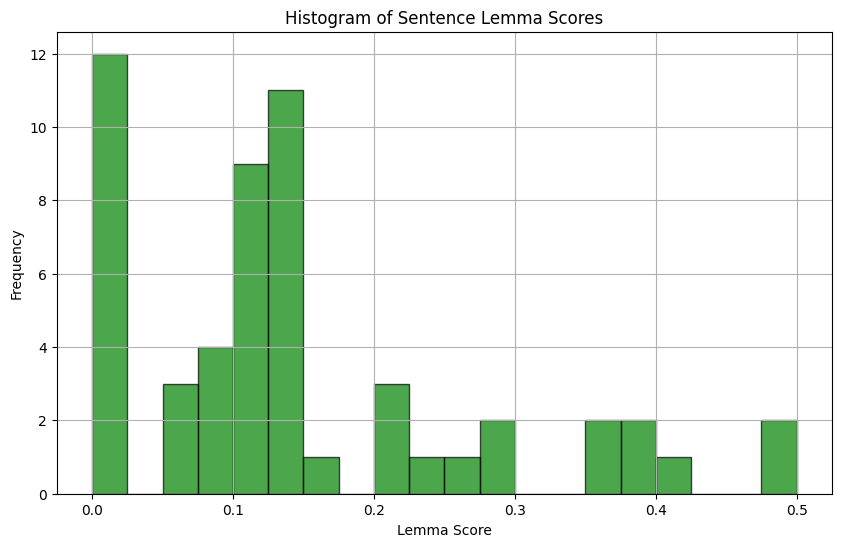

In [17]:
# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")


# Assuming you've already loaded the article text and defined interesting lemmas
# Example: list of frequent lemmas from previous steps
frequent_lemmas = ['laser', 'work', 'headlight', 'car', 'technology']  # Replace with actual lemmas

# Get the article text
article_text = soup.get_text()

# Split the article into sentences
sentences = article_text.split('.')

# Define a function to score each sentence using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    # Get lemmatized text
    words = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    interesting_count = sum(1 for lemma in words if lemma in interesting_lemmas)
    return interesting_count / len(words) if len(words) > 0 else 0

# Compute the scores for each sentence using lemmas
sentence_scores_lemmas = [score_sentence_by_lemma(sentence, frequent_lemmas) for sentence in sentences]

# Plot the histogram of lemma-based scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentence Lemma Scores')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

## Question 8:

Some words that would be omitted from the list would be:
- Verbs: work, think, come, improve, give, move, build, create, pass, develop, apply, etc.
- Adjectives: simple, modern, powerful, high, futuristic, new, efficient, etc.
- Prepositions, Conjunctions, and Articles: in, on, and, to, the, a, etc.
- Pronouns: they, it, you, we, etc.

To modify the code to only consider nouns, you can use a Part-of-Speech (POS) tagger to classify words as nouns, verbs, adjectives, etc. In Python, the spaCy library is commonly used for this task. Here's an example of how you could adapt the code:

In [ ]:
'''
# Sample text (you would replace this with your actual text)
text = "Here is your text data with words like laser, headlights, technology, etc."

# Process the text
doc = nlp(text)

# Get only the nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

print(nouns)

'''